In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df=pd.read_excel('Chapter5_NPV_DataSet.xlsx')

In [3]:
df.describe()

,Lateral_length,Stage_length,Sand_to_water_ratio,Sand_per_ft,Water_per_ft,EUR_BCF,NPV_at_3.0_MMBTU_Gas Pricing
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,8911.663566,223.834920,1.268741,2066.112041,39.069433,9.795406,-0.634117
std,2995.195633,52.900698,0.338050,903.288312,15.740073,6.193401,3.631055
min,2439.500000,85.600003,0.119433,310.728368,8.118385,0.173786,-8.092757
25%,6433.225000,178.830607,1.108849,1416.164360,26.593500,5.212174,-3.107133
50%,8089.450000,204.708946,1.249180,2027.515360,40.575506,8.570267,-1.587870
75%,11582.100000,263.308520,1.437271,2777.796760,51.229328,12.465853,1.061966
max,16918.400000,386.754534,2.442476,4964.854720,75.340213,37.375668,13.828945


In [4]:
df.columns

Index(['Lateral_length', 'Stage_length', 'Sand_to_water_ratio', 'Sand_per_ft',
       'Water_per_ft', 'EUR_BCF', 'NPV_at_3.0_MMBTU_Gas Pricing'],
      dtype='object')

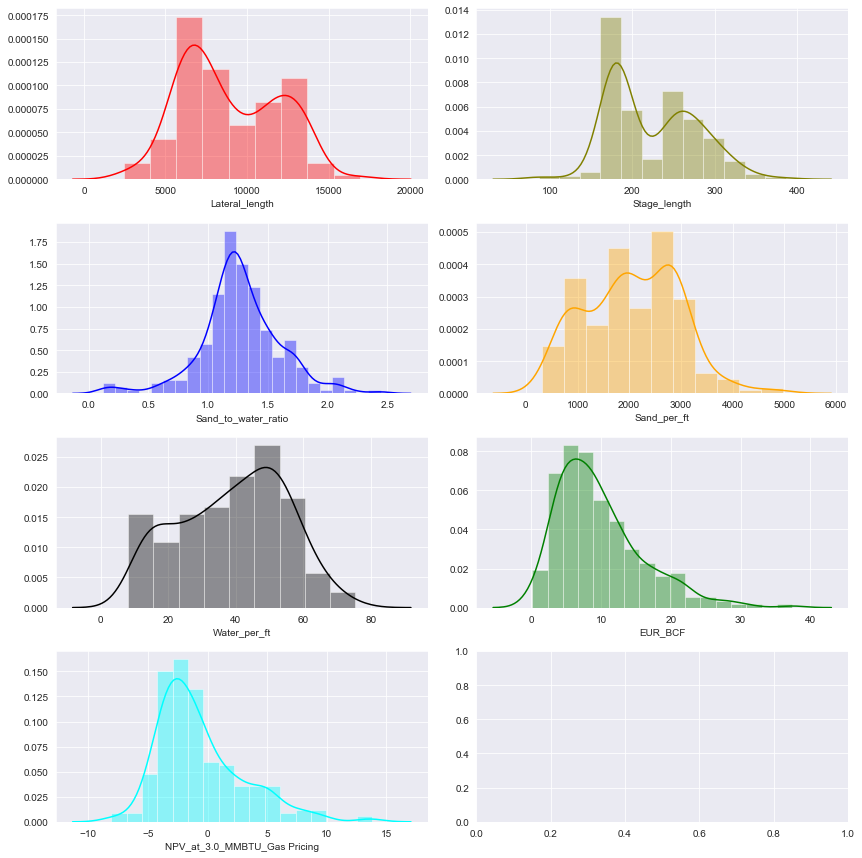

In [5]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.distplot(df['Lateral_length'] , color="red", ax=axes[0, 0])
sns.distplot(df['Stage_length'] , color="olive", ax=axes[0, 1])
sns.distplot(df['Sand_to_water_ratio'] , color="blue", ax=axes[1, 0])
sns.distplot(df['Sand_per_ft'] , color="orange", ax=axes[1, 1])
sns.distplot(df['Water_per_ft'] , color="black", ax=axes[2, 0])
sns.distplot(df['EUR_BCF'] , color="green", ax=axes[2, 1])
sns.distplot(df['NPV_at_3.0_MMBTU_Gas Pricing'] , color="cyan", ax=axes[3, 0])

plt.tight_layout()

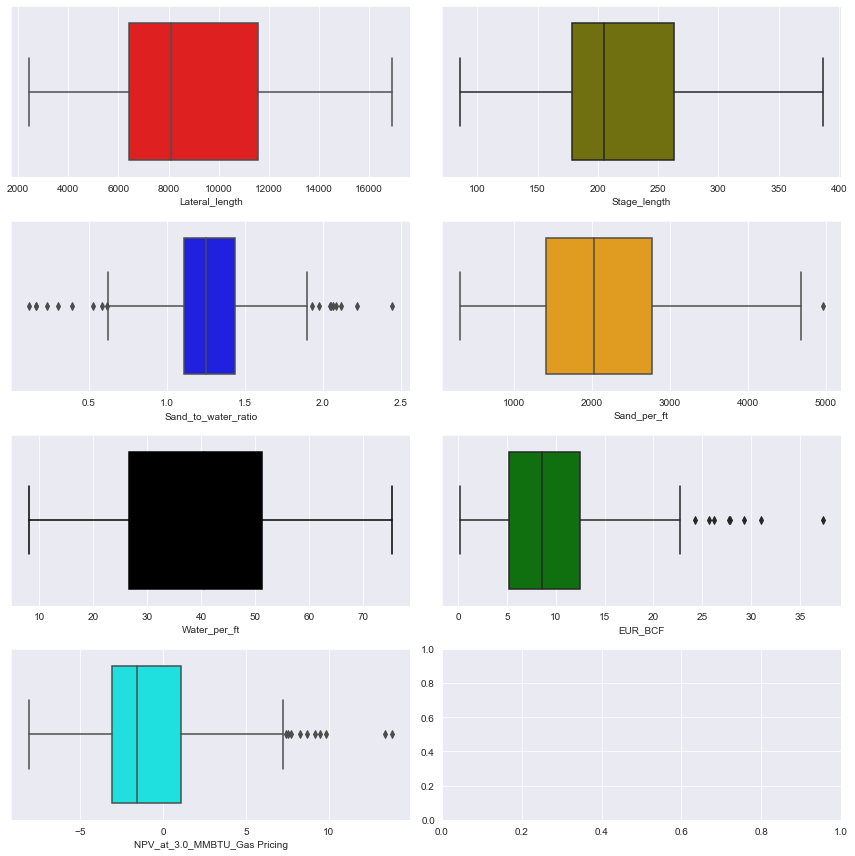

In [6]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(df['Lateral_length'] , color="red", ax=axes[0, 0])
sns.boxplot(df['Stage_length'] , color="olive", ax=axes[0, 1])
sns.boxplot(df['Sand_to_water_ratio'] , color="blue", ax=axes[1, 0])
sns.boxplot(df['Sand_per_ft'] , color="orange", ax=axes[1, 1])
sns.boxplot(df['Water_per_ft'] , color="black", ax=axes[2, 0])
sns.boxplot(df['EUR_BCF'] , color="green", ax=axes[2, 1])
sns.boxplot(df['NPV_at_3.0_MMBTU_Gas Pricing'] , color="cyan", ax=axes[3, 0])

plt.tight_layout()

In [7]:
df.columns

Index(['Lateral_length', 'Stage_length', 'Sand_to_water_ratio', 'Sand_per_ft',
       'Water_per_ft', 'EUR_BCF', 'NPV_at_3.0_MMBTU_Gas Pricing'],
      dtype='object')

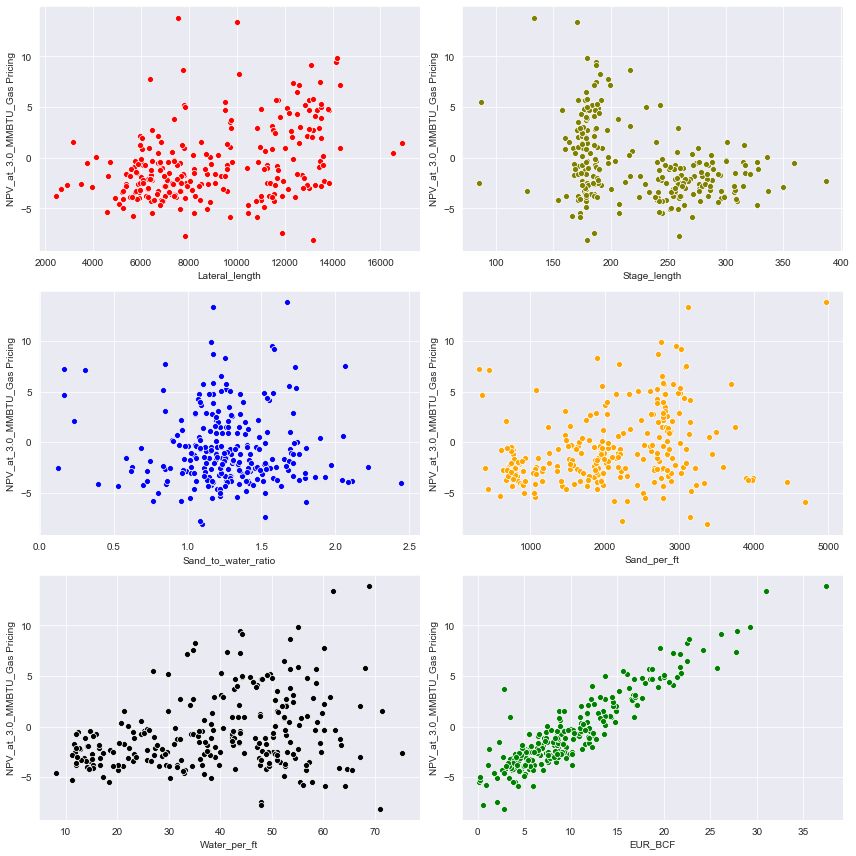

In [8]:
f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.scatterplot(df['Lateral_length'] ,df['NPV_at_3.0_MMBTU_Gas Pricing'], color="red", ax=axes[0, 0])
sns.scatterplot(df['Stage_length'] ,df['NPV_at_3.0_MMBTU_Gas Pricing'], color="olive", ax=axes[0, 1])
sns.scatterplot(df['Sand_to_water_ratio'] , df['NPV_at_3.0_MMBTU_Gas Pricing'],color="blue", ax=axes[1, 0])
sns.scatterplot(df['Sand_per_ft'] , df['NPV_at_3.0_MMBTU_Gas Pricing'] ,color="orange", ax=axes[1, 1])
sns.scatterplot(df['Water_per_ft'] , df['NPV_at_3.0_MMBTU_Gas Pricing'],color="black", ax=axes[2, 0])
sns.scatterplot(df['EUR_BCF'] ,df['NPV_at_3.0_MMBTU_Gas Pricing'], color="green", ax=axes[2, 1])

plt.tight_layout()

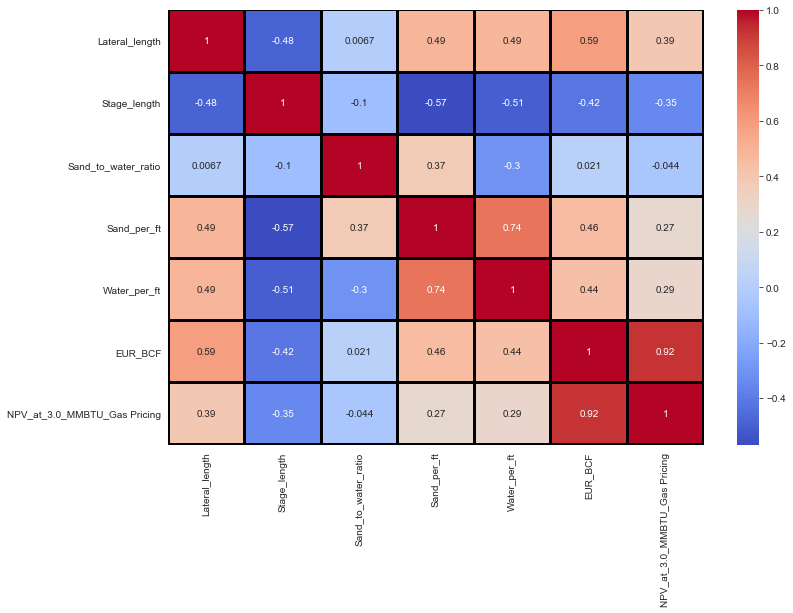

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='coolwarm', annot=True)

In [10]:
x=df.drop(['NPV_at_3.0_MMBTU_Gas Pricing'], axis=1)
y=df['NPV_at_3.0_MMBTU_Gas Pricing']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
seed= 1000
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
np.random.seed(seed)

gb= GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,  \
    criterion='friedman_mse', min_samples_split=4, min_samples_leaf=2, max_depth=3, max_features=None)

In [15]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
y_pred_train=gb.predict(X_train)
y_pred_test=gb.predict(X_test)

In [17]:
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]

print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4))

Training Data R^2= 0.9903 R= 0.9952


In [18]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]

print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4))

Testing Data R^2= 0.9168 R= 0.9575


Text(0.5, 1.0, 'NPV Training Actual Vs. Prediction')

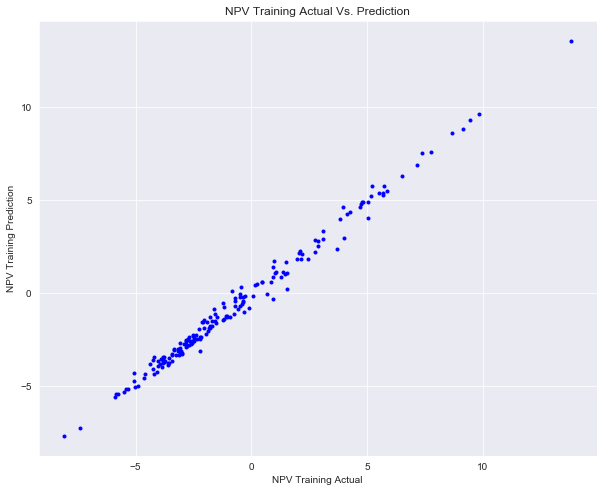

In [19]:
plt.figure(figsize=(10,8))
plt.plot(y_train, y_pred_train, 'b.')
plt.xlabel('NPV Training Actual')
plt.ylabel('NPV Training Prediction')
plt.title('NPV Training Actual Vs. Prediction')

Text(0.5, 1.0, 'NPV Testing Actual Vs. Prediction')

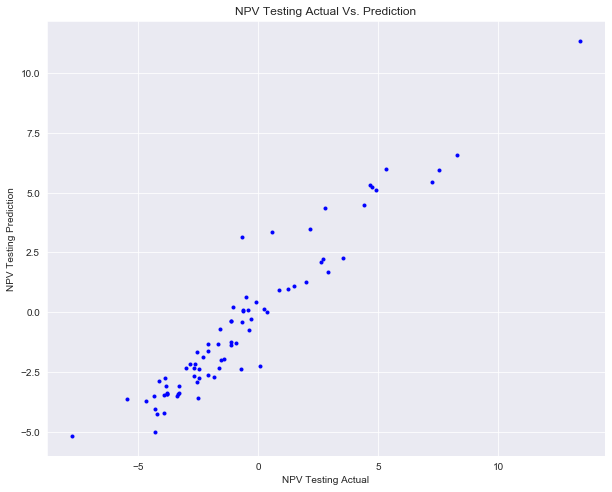

In [20]:
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'b.')
plt.xlabel('NPV Testing Actual')
plt.ylabel('NPV Testing Prediction')
plt.title('NPV Testing Actual Vs. Prediction')

In [21]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5))

MAE: 0.76514
MSE: 1.06659
RMSE: 1.03276


Text(0.5, 1.0, 'Feature Importance Ranking')

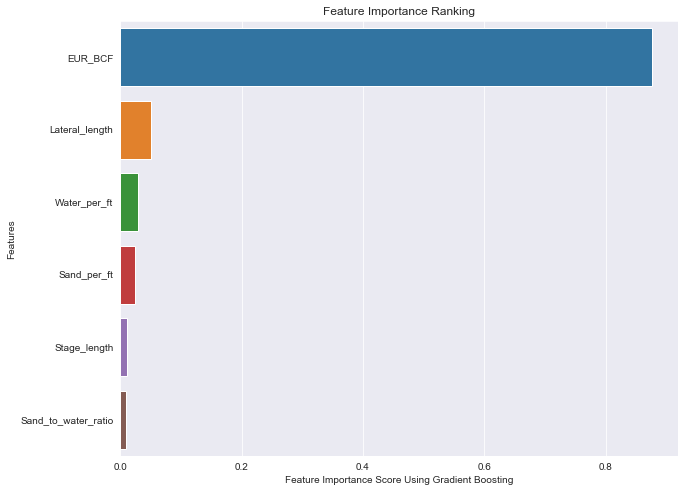

In [22]:
feature_names = df.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp = pd.Series(gb.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Gradient Boosting')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
np.random.seed(seed)
scores_R2 = cross_val_score(gb, x, y,cv=10,scoring='r2')

In [25]:
print(" R2_Cross-validation scores: {}". format( scores_R2))

 R2_Cross-validation scores: [0.8862245  0.87216255 0.76550356 0.946582   0.94277734 0.89203469
 0.54233081 0.9442973  0.93938502 0.80444424]


In [26]:
print(" Average R2_Cross-validation scores: {}". format( scores_R2.mean()))

 Average R2_Cross-validation scores: 0.8535741998748938


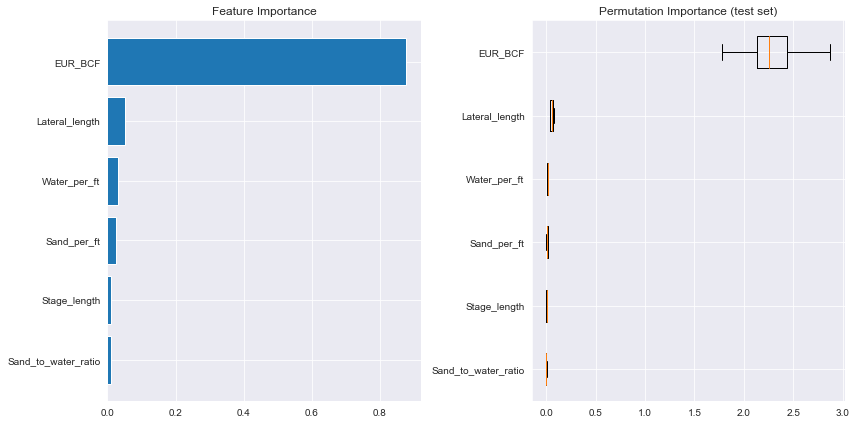

In [27]:
from sklearn.inspection import permutation_importance
feature_importance = gb.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result = permutation_importance(gb, X_test, y_test, n_repeats=10,random_state=seed)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [28]:
result

{'importances_mean': array([ 5.62673558e-02,  4.21978379e-03, -1.68587786e-03,  1.08985184e-02,
         1.29103662e-02,  2.28967526e+00]),
 'importances_std': array([0.01485314, 0.00449182, 0.00290839, 0.00638356, 0.00391517,
        0.27624977]),
 'importances': array([[ 8.15151462e-02,  3.95292772e-02,  7.02221645e-02,
          3.65059457e-02,  6.03294438e-02,  4.96642294e-02,
          5.30148570e-02,  5.79832600e-02,  3.92243716e-02,
          7.46848629e-02],
        [ 7.44887785e-03,  9.59443016e-03,  2.58807132e-03,
         -1.38147086e-03, -1.05835466e-03,  9.27570663e-03,
          5.14050355e-03,  4.35297088e-03, -2.86902680e-03,
          9.10612984e-03],
        [ 4.48758354e-03,  1.25757307e-03, -2.61008665e-03,
         -1.66488246e-03, -5.10349406e-03, -3.54065341e-03,
         -4.17053339e-03,  1.94360646e-04, -5.02201479e-03,
         -6.86631090e-04],
        [ 2.16017350e-02,  1.38400077e-02,  1.45205740e-02,
          1.05278583e-02,  9.32294255e-04,  1.76246999e